# DESCRIPTIVE DSC USE CASE

## Team
### Alice Dengonzague
### Shivakumar M
### Shashank Gollapalli

In [1]:
#Importing the necessary libraries

import sys

import numpy                as np
import seaborn              as sns
import pandas               as pd
import matplotlib.pyplot    as plt

from datetime               import datetime
from datetime               import date
from sklearn.linear_model   import LogisticRegression
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.metrics        import accuracy_score
from sklearn.metrics        import auc
from sklearn.metrics        import roc_auc_score
from scipy.stats            import pearsonr
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2

In [2]:
#Importing local librariries

from ieseg import partition
from ieseg import roc
from ieseg import lift
from ieseg import cumulativeResponse
from ieseg import cumulativeGains

In [3]:
#path

directory = r"C:\Users\sgollapalli\OneDrive - IESEG\Documents\Descriptive\Group\Project\Zip"
inputData = directory + "\Data"

In [4]:
#read-in data

campaign = pd.read_csv(inputData + "/campaigns.csv", sep=';')
donors = pd.read_csv(inputData + "/donors.csv")
gifts = pd.read_csv(inputData + "/gifts.csv")
train = pd.read_csv(inputData + "/selection campaign 6169.csv")
test = pd.read_csv(inputData + "/selection campaign 7244.csv")
selection = pd.read_csv(inputData + "/selection campaign 7662 (without gifts).csv")

## Campaign Data

### Analyzing data

#### Table details

In [5]:
#columns
for (index,column) in enumerate(campaign.columns):
    print(f"Column {index}: {column}")

Column 0: campaignID
Column 1: date
Column 2: lettersSent
Column 3: CostUnit


In [6]:
#shape and head
print('Col x Rows:',campaign.shape)
campaign.head()

Col x Rows: (367, 4)


,campaignID,date,lettersSent,CostUnit
0,153,13/12/2004,6 873,"0,17 €"
1,154,01/01/2005,7 656,"0,30 €"
2,180,18/01/2005,9 933,"0,20 €"
3,433,29/01/2005,7 448,"0,59 €"
4,476,12/02/2005,6 605,"0,51 €"


In [7]:
#data types of campaign
campaign.dtypes

campaignID      int64
date           object
lettersSent    object
CostUnit       object
dtype: object

In [8]:
#Missing values in the data set
campaign.isna().sum()

campaignID     0
date           0
lettersSent    0
CostUnit       0
dtype: int64

### Cleaning Campaign data set and creating new variables

In [9]:
#1. Cleaning 'lettersSent' column

#1a. checking unique values in the lettersSent column
campaign['lettersSent'].unique()

array(['6\u202f873', '7\u202f656', '9\u202f933', '7\u202f448',
       '6\u202f605', '5\u202f441', '8\u202f417', '8\u202f986',
       '8\u202f246', '8\u202f120', '5\u202f193', '5\u202f244',
       '18\u202f230', '17\u202f976', '22\u202f810', '24\u202f950',
       '30\u202f031', '15\u202f716', '21\u202f712', '28\u202f764',
       '38\u202f052', '31\u202f961', '20\u202f290', '38\u202f859',
       '39\u202f783', '36\u202f151', '7\u202f682', '37\u202f626',
       '36\u202f616', '33\u202f015', '38\u202f380', '38\u202f431',
       '34\u202f657', '32\u202f260', '39\u202f037', '30\u202f593',
       '35\u202f119', '32\u202f113', '9\u202f496', '38\u202f342',
       '34\u202f620', '34\u202f719', '36\u202f619', '39\u202f806',
       '24\u202f934', '37\u202f662', '35\u202f984', '34\u202f003',
       '38\u202f326', '36\u202f898', '9\u202f196', '31\u202f051',
       '25\u202f207', '23\u202f399', '38\u202f426', '28\u202f098',
       '36\u202f693', '27\u202f178', '36\u202f013', '32\u202f766',
       '32

In [10]:
#1b. Removing the space and converting column type to int
campaign["lettersSent"] = campaign["lettersSent"].str.replace("\u202f","").astype(int)

In [11]:
#2. CostUnit column

#2a. Checking unique values in the CostUnit column
campaign['CostUnit'].unique()

array(['0,17\xa0€', '0,30\xa0€', '0,20\xa0€', '0,59\xa0€', '0,51\xa0€',
       '0,40\xa0€', '0,29\xa0€', '0,37\xa0€', '0,48\xa0€', '0,31\xa0€',
       '0,52\xa0€', '0,02\xa0€', '0,00\xa0€', '0,14\xa0€', '0,25\xa0€',
       '0,41\xa0€', '0,10\xa0€', '0,32\xa0€', '0,23\xa0€', '0,22\xa0€',
       '0,08\xa0€', '0,19\xa0€', '0,06\xa0€', '0,45\xa0€', '0,28\xa0€',
       '0,04\xa0€', '0,50\xa0€', '0,12\xa0€', '0,34\xa0€', '0,21\xa0€',
       '0,33\xa0€', '0,11\xa0€', '0,09\xa0€', '0,60\xa0€', '0,61\xa0€',
       '0,07\xa0€', '0,56\xa0€', '0,18\xa0€', '0,15\xa0€', '0,05\xa0€',
       '0,26\xa0€', '0,39\xa0€', '0,03\xa0€', '0,57\xa0€', '0,38\xa0€',
       '0,13\xa0€', '0,16\xa0€', '0,35\xa0€', '0,46\xa0€', '0,27\xa0€',
       '0,58\xa0€', '0,24\xa0€', '0,87\xa0€', '0,55\xa0€', '0,69\xa0€',
       '0,01\xa0€', '0,36\xa0€'], dtype=object)

In [12]:
#2b. Dropping the space and EUR
campaign['CostUnit'] = campaign["CostUnit"].str[:4]

#2c. Replacing , with .
campaign['CostUnit'] = campaign["CostUnit"].str.replace(',','.')

#2d. Converting to float
campaign['CostUnit'] = campaign["CostUnit"].astype(float)

In [13]:
#3. changing the format of the date column
campaign['date'] = pd.to_datetime(campaign['date'], infer_datetime_format=True)

#3a. Creating new column for year
campaign['CampYear'] = campaign['date'].dt.year

#3b. Renaming date column
campaign = campaign.rename(columns={'date': 'CampDate'})

In [14]:
#4. Calculaing the total costs for each campaign
campaign['CampCost'] = campaign['CostUnit'] * campaign['lettersSent']

In [15]:
#cleaned data
print(campaign.shape)
campaign.head()

(367, 6)


,campaignID,CampDate,lettersSent,CostUnit,CampYear,CampCost
0,153,2004-12-13,6873,0.17,2004,1168.41
1,154,2005-01-01,7656,0.30,2005,2296.80
2,180,2005-01-18,9933,0.20,2005,1986.60
3,433,2005-01-29,7448,0.59,2005,4394.32
4,476,2005-02-12,6605,0.51,2005,3368.55


### Visualising campaign data

Text(0.5, 1.0, 'Number of Campaigns per Year')

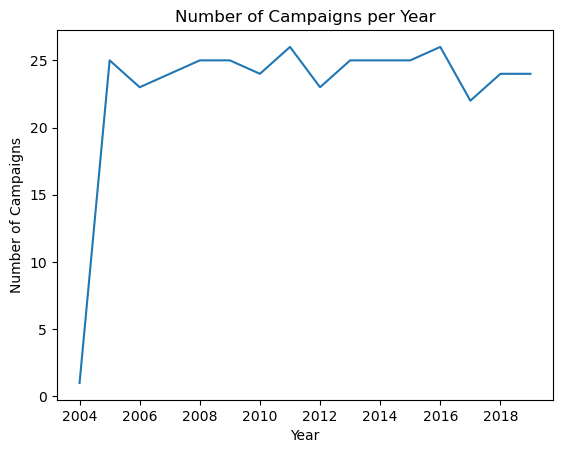

In [16]:
#1. Number of Campaigns per Year

campaign.groupby('CampYear')['campaignID'].count().plot()
plt.xlabel('Year')
plt.ylabel('Number of Campaigns')
plt.title('Number of Campaigns per Year')

Text(0.5, 1.0, 'Campaign expenditure per Year')

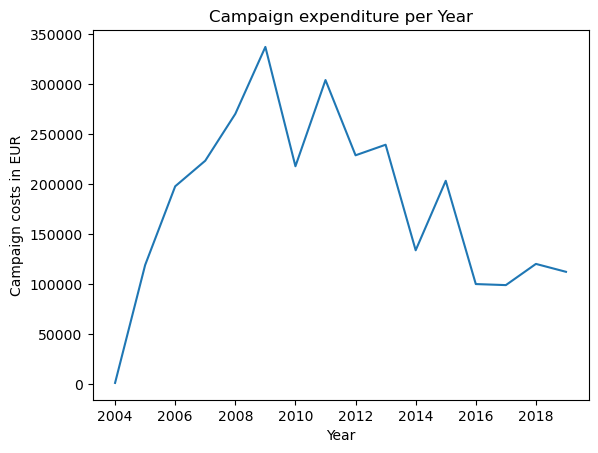

In [17]:
#2. Campaign expenditure per Year

campaign.groupby('CampYear')['CampCost'].sum().plot()
plt.xlabel('Year')
plt.ylabel('Campaign costs in EUR')
plt.title('Campaign expenditure per Year')

## Donors Data

### Analyzing data

In [18]:
#column details
for (index,column) in enumerate(donors.columns):
    print(f"Column {index}: {column}")

Column 0: Unnamed: 0
Column 1: donorID
Column 2: zipcode
Column 3: province
Column 4: region
Column 5: gender
Column 6: language
Column 7: dateOfBirth


In [19]:
#shape and head
print('Col x Rows:',donors.shape)
donors.head()

Col x Rows: (44691, 8)


,Unnamed: 0,donorID,zipcode,province,region,gender,language,dateOfBirth
0,0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
1,1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952
2,2,100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986
3,3,100004,1020.0,Brussels,Brussels,F,FR,03/29/1952
4,4,100005,1020.0,Brussels,Brussels,F,FR,06/25/1986


In [20]:
#data types of campaign
donors.dtypes

Unnamed: 0       int64
donorID          int64
zipcode        float64
province        object
region          object
gender          object
language        object
dateOfBirth     object
dtype: object

In [21]:
#Missing values in the data set
donors.isna().sum()

Unnamed: 0      0
donorID         0
zipcode         2
province        0
region          0
gender         32
language        0
dateOfBirth     0
dtype: int64

### Cleaning Donors data set and creating new variables

In [22]:
#1. Dropping columns

#1.a dropping the 'Unnamed: 0' column
donors = donors.drop(['Unnamed: 0'], axis=1)

In [23]:
#2. Checking province column
donors.groupby('province').size().sort_values().rename('count').reset_index()

,province,count
0,Missing,2
1,ANTWERP,157
2,Luxembourg,303
3,Namur,401
4,Walloon Brabant,433
5,Hainaut,944
6,Liege,970
7,Brussels,1488
8,Limburg,4818
9,Flemish Brabant,6781


In [24]:
#2a. Replacing ANTWERP by Antwerp
donors['province'] = donors['province'].str.replace('ANTWERP','Antwerp')

In [25]:
#2b. Extracting rows from province column with 'Missing' value
donors[donors['province'] == 'Missing']

,donorID,zipcode,province,region,gender,language,dateOfBirth
5019,105020,NaN,Missing,Missing,M,EN,11/09/1966
22100,122101,NaN,Missing,Missing,F,EN,10/31/1975


In [26]:
#2c. Creating flags for above extracted rows
donors['province_flags'] = np.where(donors['province'] == 'Missing', 1, 0)

#2d. Extracting all values of region when language is EN
donors[donors['language'] == 'EN']

,donorID,zipcode,province,region,gender,language,dateOfBirth,province_flags
533,100534,3080.0,Flemish Brabant,Flanders,M,EN,06/07/1982,0
5019,105020,NaN,Missing,Missing,M,EN,11/09/1966,1
6634,106635,3080.0,Flemish Brabant,Flanders,F,EN,01/14/1966,0
22100,122101,NaN,Missing,Missing,F,EN,10/31/1975,1
26348,126349,3080.0,Flemish Brabant,Flanders,M,EN,06/23/1954,0
43374,143375,3090.0,Flemish Brabant,Flanders,F,EN,11/07/1962,0


In [27]:
#2e. replacing the 'Missing' value with the most occuring province and region
donors['province'] = donors['province'].replace('Missing','Flemish Brabant')
donors['region'] = donors['region'].replace('Missing','Flanders')

In [28]:
#3 Cleaning Gender Column

#3a. Extracting rows with missing values
donors[donors['gender'].isna()]

,donorID,zipcode,province,region,gender,language,dateOfBirth,province_flags
83,100084,1500.0,Flemish Brabant,Flanders,NaN,NL,03/16/1950,0
217,100218,1300.0,Walloon Brabant,Wallonia,NaN,FR,08/04/1979,0
512,100513,1933.0,Flemish Brabant,Flanders,NaN,NL,03/17/1952,0
552,100553,1560.0,Flemish Brabant,Flanders,NaN,FR,12/05/1952,0
729,100730,2950.0,Antwerp,Flanders,NaN,NL,11/09/1959,0
883,100884,2910.0,Antwerp,Flanders,NaN,NL,10/28/1977,0
1056,101057,2200.0,Antwerp,Flanders,NaN,NL,04/20/1938,0
2050,102051,3650.0,Limburg,Flanders,NaN,NL,08/16/1936,0
2209,102210,3970.0,Limburg,Flanders,NaN,NL,04/05/1980,0
2379,102380,5080.0,Namur,Wallonia,NaN,FR,06/30/1982,0


In [29]:
#3b. Creating flags for the above extracted rows
donors['gender_flags'] = np.where(donors['province'] == np.nan, 1, 0)

#3c. Checking the frequency of gender values across regions
donors.groupby('province')['gender'].value_counts().reset_index(name='counts')

,province,gender,counts
0,Antwerp,M,5985
1,Antwerp,F,4460
2,Brussels,M,863
3,Brussels,F,623
4,East Flanders,M,5322
5,East Flanders,F,3812
6,Flemish Brabant,M,3993
7,Flemish Brabant,F,2785
8,Hainaut,M,532
9,Hainaut,F,412


In [30]:
#3d. Replacing missing values with 'M' as the majority of gender in all the provinces is 'M'
donors['gender'] = donors['gender'].fillna('M')

In [31]:
#4. Checking the ZipCode Column

#4a. Creating flags for zipcode column
donors['zipcode_flags'] = np.where(((donors['zipcode'].isna()) | (donors['zipcode'] == 0)), 1, 0)

#4b. Checking donors column with Zipcode value as 0
donors[donors['zipcode'] == 0]

,donorID,zipcode,province,region,gender,language,dateOfBirth,province_flags,gender_flags,zipcode_flags
15231,115232,0.0,Walloon Brabant,Wallonia,M,FR,02/06/1932,0,0,1


In [32]:
#4c. subsetting the donors which have values similar to step 4b
temp = donors[(donors['region'] == 'Wallonia') & (donors['province'] == 'Walloon Brabant') & (donors['language'] == 'FR') & (donors['gender'] == 'M')]

#4d. Grouping the subset by region and calculating the freq of each zipcode ordered desc
temp = temp.groupby('region')['zipcode'].value_counts().reset_index(name='counts')

#4e. Extracting the zip code with the highest frequency
print('\n','Zipcode with highest frequency is',temp.iloc[0, 1])


 Zipcode with highest frequency is 1410.0


In [33]:
#4f. Replacing 0 in zipcode with the highest occuring zipcode value for the conditions in step 4b
donors['zipcode'] = donors['zipcode'].replace(0,temp.iloc[0, 1])

#4g. Checking donors column with Zipcode value as 0
donors[donors['zipcode'].isna()]

,donorID,zipcode,province,region,gender,language,dateOfBirth,province_flags,gender_flags,zipcode_flags
5019,105020,NaN,Flemish Brabant,Flanders,M,EN,11/09/1966,1,0,1
22100,122101,NaN,Flemish Brabant,Flanders,F,EN,10/31/1975,1,0,1


In [34]:
#4h. subsetting the donors who have values similar to step 4g with gender M
temp1 = donors[(donors['region'] == 'Flanders') & (donors['province'] == 'Flemish Brabant') & (donors['language'] == 'EN')]

#4i. Grouping the subset by region and calculating the freq of each zipcode ordered desc
temp1 = temp1.groupby('region')['zipcode'].value_counts().reset_index(name='counts')
print(temp1)

#4j. Extracting the zip code with the highest frequency
print('\n','Zipcode with highest frequency for missing values of Zipcode is',temp1.iloc[0, 1])

     region  zipcode  counts
0  Flanders   3080.0       3
1  Flanders   3090.0       1

 Zipcode with highest frequency for missing values of Zipcode is 3080.0


In [35]:
#4k. Replacing 0 in zipcode with the highest occuring zipcode value for the conditions in step 4g
donors['zipcode'] = donors['zipcode'].replace(np.nan,temp1.iloc[0, 1])

#4l. Converting the type of zipcode column to int
donors['zipcode'] = donors['zipcode'].astype(int)

In [36]:
#5. Checking Date of Birth Column

#5a. Converting the date of birth column to date type
donors['dateOfBirth'] = pd.to_datetime(donors['dateOfBirth'])

#5aa. Creating birth month for donors
donors['DonorBM'] = donors['dateOfBirth'].dt.month

In [37]:
#5. Checking Date of Birth Column

#5a. Converting the date of birth column to date type
donors['dateOfBirth'] = pd.to_datetime(donors['dateOfBirth'])

#5aa. Creating birth month for donors
donors['DonorBM'] = donors['dateOfBirth'].dt.month

#5b. Calculating the age and age group and birth month of donors at the time of 6169
donors['DonorAge6169'] = 2018 - donors['dateOfBirth'].dt.year
donors['DonorAgeGroup6169'] = donors['DonorAge6169'] // 10 * 10

#5c. Calculating the age and age group of donors at the time of 7244
donors['DonorAge7244'] = 2019 - donors['dateOfBirth'].dt.year
donors['DonorAgeGroup7244'] = donors['DonorAge7244'] // 10 * 10

#5d. Calculating the age and age group of donors at the time of 7244
donors['DonorAge7662'] = 2020 - donors['dateOfBirth'].dt.year
donors['DonorAgeGroup7662'] = donors['DonorAge7662'] // 10 * 10

In [38]:
#6. Checking the number of speakers per language
donors.groupby('language')['province'].value_counts().reset_index(name='counts')

,language,province,counts
0,EN,Flemish Brabant,6
1,FR,Liege,966
2,FR,Hainaut,934
3,FR,Brussels,911
4,FR,Walloon Brabant,425
5,FR,Namur,394
6,FR,Luxembourg,299
7,FR,Flemish Brabant,286
8,FR,West Flanders,151
9,FR,Antwerp,106


In [39]:
#1. Recoding gender values with F = 1 and M = 0
def GenderRecode(x):
    if x == 'F':
        return 1
    else:
        return 0

#2. Recoding gender values with NL = 1, FR = 0 and EN = 0 (as there are only 6 english speakers)
def LanguagerRecode(x):
    if x == 'NL':
        return 1
    else:
        return 0
    
#3. Recoding birthmonth with categorical values
def BirthMonthRecode(x):
    if x == 1:
        return 'January'
    elif x == 2:
        return 'February'
    elif x == 3:
        return 'March'
    elif x == 4:
        return 'April'
    elif x == 5:
        return 'May'
    elif x == 6:
        return 'June'
    elif x == 7:
        return 'July'
    elif x == 8:
        return 'August'
    elif x == 9:
        return 'September'
    elif x == 10:
        return 'October'
    elif x == 11:
        return 'November'
    else:
        return 'December'
    
#3. Mapping the above functions to the columns
donors['gender_recoded'] = donors['gender'].map(GenderRecode)
donors['language_recoded'] = donors['language'].map(LanguagerRecode)
donors['DonorBM'] = donors['DonorBM'].map(BirthMonthRecode)

#4. Dropping the original columns
donors = donors.drop(['gender'], axis=1)
donors = donors.drop(['language'], axis=1)

#5. creating dummy variables for province and region and birth month column
donors = donors.join(pd.get_dummies(donors["province"], prefix = "province", drop_first = True))
donors = donors.join(pd.get_dummies(donors["region"], prefix = "region", drop_first = True))
donors = donors.join(pd.get_dummies(donors["DonorBM"], prefix = "BM", drop_first = True))

#6. dropping the old columns
donors = donors.drop(['province'], axis=1)
donors = donors.drop(['region'], axis=1)
donors = donors.drop(['DonorBM'], axis=1)

#head post encoding
print(donors.shape)
donors.head()

(44691, 37)


,donorID,zipcode,dateOfBirth,province_flags,gender_flags,zipcode_flags,DonorAge6169,DonorAgeGroup6169,DonorAge7244,DonorAgeGroup7244,...,BM_December,BM_February,BM_January,BM_July,BM_June,BM_March,BM_May,BM_November,BM_October,BM_September
0,100001,1861,1967-12-24,0,0,0,51,50,52,50,...,1,0,0,0,0,0,0,0,0,0
1,100002,2260,1952-01-14,0,0,0,66,60,67,60,...,0,0,1,0,0,0,0,0,0,0
2,100003,1780,1986-12-23,0,0,0,32,30,33,30,...,1,0,0,0,0,0,0,0,0,0
3,100004,1020,1952-03-29,0,0,0,66,60,67,60,...,0,0,0,0,0,1,0,0,0,0
4,100005,1020,1986-06-25,0,0,0,32,30,33,30,...,0,0,0,0,1,0,0,0,0,0


In [298]:
list(donors)

['donorID',
 'zipcode',
 'dateOfBirth',
 'province_flags',
 'gender_flags',
 'zipcode_flags',
 'DonorAge6169',
 'DonorAgeGroup6169',
 'DonorAge7244',
 'DonorAgeGroup7244',
 'DonorAge7662',
 'DonorAgeGroup7662',
 'gender_recoded',
 'language_recoded',
 'province_Brussels',
 'province_East Flanders',
 'province_Flemish Brabant',
 'province_Hainaut',
 'province_Liege',
 'province_Limburg',
 'province_Luxembourg',
 'province_Namur',
 'province_Walloon Brabant',
 'province_West Flanders',
 'region_Flanders',
 'region_Wallonia',
 'BM_August',
 'BM_December',
 'BM_February',
 'BM_January',
 'BM_July',
 'BM_June',
 'BM_March',
 'BM_May',
 'BM_November',
 'BM_October',
 'BM_September']

### Visualisation

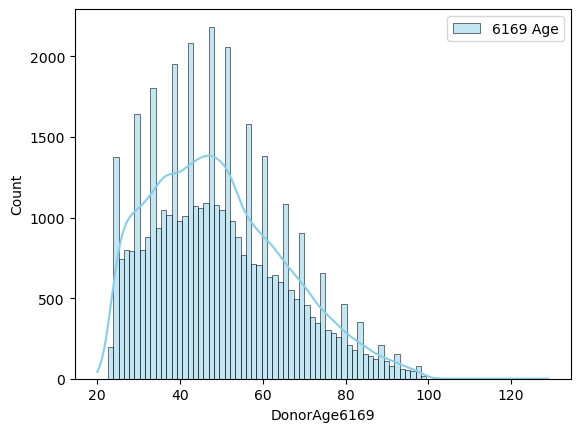

In [304]:
#1. age of donors across train set 6169
sns.histplot(data=donors["DonorAge6169"], x=donors["DonorAge6169"], color="skyblue", label="6169 Age", kde=True)

<AxesSubplot:xlabel='DonorAge7244', ylabel='Count'>

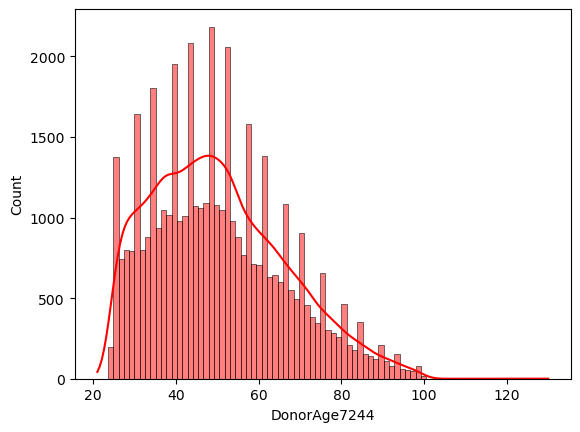

In [297]:
#2. age of donors across test set 7244
sns.histplot(data=donors["DonorAge7244"], x=donors["DonorAge7244"], color="red", label="7244 Age", kde=True)

## Selection data

In [41]:
#shape and head
print('Col x Rows:',selection.shape)
selection.head()

Col x Rows: (26522, 1)


,donorID
0,D134242
1,D126503
2,D104392
3,D105905
4,D120506


In [42]:
#dropping the 'D' from Donor IDs
selection['donorID'] = selection['donorID'].str[1:].astype(int)

## Gifts Data

#### Analyzing the data

In [43]:
#column details
for (index,column) in enumerate(gifts.columns):
    print(f"Column {index}: {column}")

Column 0: Unnamed: 0
Column 1: donorID
Column 2: campaignID
Column 3: amount
Column 4: date


In [44]:
#shape and head
print('Col x Rows:',gifts.shape)
gifts.head()

Col x Rows: (216594, 5)


,Unnamed: 0,donorID,campaignID,amount,date
0,0,100001,NaN,"12,39",2004-03-23
1,1,100001,1577.0,"12,39",2007-10-11
2,2,100001,1634.0,"6,69",2007-12-28
3,3,100001,1778.0,"24,79",2008-06-14
4,4,100001,1808.0,"7,44",2008-07-09


In [45]:
#data types of campaign
gifts.dtypes

Unnamed: 0      int64
donorID         int64
campaignID    float64
amount         object
date           object
dtype: object

In [46]:
#Missing values in the data set
gifts.isna().sum()

Unnamed: 0        0
donorID           0
campaignID    15637
amount            0
date              0
dtype: int64

#### Cleaning and creating new variables

In [47]:
#1. Dropping columns

#1a. dropping the 'Unnamed: 0' column
gifts = gifts.drop(['Unnamed: 0'], axis=1)

In [48]:
#2. Checking the gifts Column

#2a. Filling the missing values in the column with 0
#gifts['campaignID'] = gifts['campaignID'].fillna(0)
gifts = gifts.dropna()

#2b. Converting column type to int
gifts['campaignID'] = gifts['campaignID'].astype(int)

In [49]:
#3. Checking the amount Column

#3a. Checking the values in the amount column
gifts['amount'].sort_values(ascending = False)

53964     991,57
129272    991,57
133394     99,16
3630       99,16
59942      99,16
           ...  
156468      0,25
114594      0,25
210571       0,2
159456       0,2
152747       0,1
Name: amount, Length: 200957, dtype: object

In [50]:
#3b. reformatting the values in the amount column and converting type to float
gifts['amount'] = gifts['amount'].str.replace(',','.')
gifts['amount'] = gifts['amount'].astype(float)

In [51]:
#3c. Looking for outliers
#gifts.groupby('donorID')[['campaignID','amount']].sum().sort_values(by='amount',ascending = False).reset_index()

In [52]:
#3d. replacing outliers with the median value
#gifts['amount'] = gifts.amount.replace([gifts['amount'] > 100000],gifts['amount'].median)

In [53]:
#3c. Renaming the amount Column
gifts = gifts.rename(columns={'amount': 'DonAmount'})

In [54]:
#4. Checking Date column

#4a. changing the format of the date column
gifts['date'] = pd.to_datetime(gifts['date'], infer_datetime_format=True)

#4b. Renaming date column
gifts = gifts.rename(columns={'date': 'DonDate'})

print('Col x Rows:',gifts.shape)
gifts.head()

Col x Rows: (200957, 4)


,donorID,campaignID,DonAmount,DonDate
1,100001,1577,12.39,2007-10-11
2,100001,1634,6.69,2007-12-28
3,100001,1778,24.79,2008-06-14
4,100001,1808,7.44,2008-07-09
5,100001,1933,24.79,2008-12-01


In [55]:
gifts.dtypes

donorID                int64
campaignID             int32
DonAmount            float64
DonDate       datetime64[ns]
dtype: object

#### Calculating LOR, RFM for gifts data

In [56]:
#calculating the LOR for all donors till the start date of 6169 campaign
LOR_6169 = gifts.groupby('donorID').agg(firstDonDate = ('DonDate','min')).reset_index()
LOR_6169['LOR'] = datetime(2018,9,4) - LOR_6169['firstDonDate']

LOR_6169['LOR'] = LOR_6169['LOR'].astype(str).str[:-5].astype(int)
LOR_6169['LOR'] = round(LOR_6169['LOR']/365,2)

In [57]:
LOR_6169.head()

,donorID,firstDonDate,LOR
0,100001,2007-10-11,10.91
1,100002,2015-01-10,3.65
2,100003,2017-07-27,1.11
3,100004,2005-07-02,13.18
4,100005,2006-10-07,11.92


In [58]:
#calculating the LOR for all donors till the start date of 6169 campaign
LOR = gifts.groupby('donorID').agg(firstDonDate = ('DonDate','min')).reset_index()
LOR['LOR_6169_Days'] = datetime(2018,9,4) - LOR['firstDonDate']
LOR['LOR_6169_Days'] = LOR['LOR_6169_Days'].astype(str).str[:-5].astype(int)
LOR['LOR_6169_years'] = round(LOR['LOR_6169_Days']/365,2)

#calculating the LOR for all donors till the start date of 7244 campaign
LOR['LOR_7244_Days'] = datetime(2019,6,18) - LOR['firstDonDate']
LOR['LOR_7244_Days'] = LOR['LOR_7244_Days'].astype(str).str[:-5].astype(int)
LOR['LOR_7244_years'] = round(LOR['LOR_7244_Days']/365,2)

#calculating the LOR for all donors till the start date of 7662 campaign
LOR['LOR_7662_Days'] = datetime(2020,2,1) - LOR['firstDonDate']
LOR['LOR_7662_Days'] = LOR['LOR_7662_Days'].astype(str).str[:-5].astype(int)
LOR['LOR_7662_years'] = round(LOR['LOR_7662_Days']/365,2)

#dropping columns
LOR.drop(columns = ['firstDonDate','LOR_6169_Days', 'LOR_7244_Days', 'LOR_7662_Days'], inplace=True)

print('Col x Rows:',LOR.shape)
LOR.head()

Col x Rows: (43437, 4)


,donorID,LOR_6169_years,LOR_7244_years,LOR_7662_years
0,100001,10.91,11.69,12.32
1,100002,3.65,4.44,5.06
2,100003,1.11,1.89,2.52
3,100004,13.18,13.97,14.59
4,100005,11.92,12.70,13.33


In [59]:
#Function to calculate the RFM for a df

def RFM(df):
    
    #calculating the R, F and M ranks
    df = df.groupby('donorID').agg(Recency = ('DonDate', 'max'), 
                                   Frequency = ('campaignID', 'count'), 
                                   Monetary = ('DonAmount', 'sum')).reset_index()    
    return df

#function to segment donors based on their RFM Score

#def RFM_Group(x):
    #if x['RFM_Score'] >= 1.7:
        #return 'Gold'
    #elif (x['RFM_Score'] >= 1.4) and x['RFM_Score'] < 1.7:
        #return 'Silver'
   # else:
        #return 'Bronze'

### Filtering Gifts data for train and test campaigns

In [60]:
#filtering gifts to only have donors who have donoted more than 30 EUR
gifts = gifts[gifts['DonAmount'] >= 30]

#calculating RFM for all donors lifetime
#gifts_RFM = RFM(gifts)

#segmeting the donors based on thier RFM Score
#gifts_RFM['RFM_Segment'] = gifts_RFM.apply(RFM_Group,axis=1) 

#dropping columns
#gifts_RFM = gifts_RFM.drop(['RFM_Score'], axis=1)

#print('Col x Rows:',gifts_RFM.shape)
#gifts_RFM.head()

### Train campaign 6169

In [61]:
#calculating RFM for all donors 6169 campaign (train campaign)

#filtering gifts for 6169
gifts6169 = gifts[(gifts['DonDate'] < '04-09-2018')]

gifts6169_RFM = RFM(gifts6169)

#segmeting the donors based on thier RFM Score
#gifts6169_RFM['RFM_Segment'] = gifts6169_RFM.apply(RFM_Group,axis=1) 

#dropping columns
#gifts6169_RFM = gifts6169_RFM.drop(['RFM_Score'], axis=1)

#converting dates in recency to numbers
gifts6169_RFM['Recency'] = (datetime.strptime('2018/09/04', "%Y/%m/%d") - gifts6169_RFM['Recency']).astype(str).str[:-5].astype(int)

print('Col x Rows:',gifts6169_RFM.shape)
gifts6169_RFM.head()

Col x Rows: (23708, 4)


,donorID,Recency,Frequency,Monetary
0,100001,3389,1,30.00
1,100004,2650,10,319.58
2,100007,278,10,330.00
3,100008,2503,2,99.58
4,100010,1330,1,40.00


In [62]:
gifts6169_RFM.describe()

,donorID,Recency,Frequency,Monetary
count,23708.000000,23708.000000,23708.000000,2.370800e+04
mean,121876.042855,2056.390459,3.488865,2.545771e+02
std,12614.920776,1043.876232,4.736816,1.610302e+04
min,100001.000000,149.000000,1.000000,3.000000e+01
25%,111100.750000,1260.000000,1.000000,3.500000e+01
50%,122681.500000,2072.500000,2.000000,6.500000e+01
75%,132527.250000,2762.000000,4.000000,1.554250e+02
max,144691.000000,4999.000000,106.000000,2.479000e+06


In [63]:
gifts6169_RFM.dtypes

donorID        int64
Recency        int32
Frequency      int64
Monetary     float64
dtype: object

In [64]:
#distribution of segmentation in 6169
#gifts6169_RFM.groupby('RFM_Segment').agg(Number_of_Donors = ('RFM_Segment','count')).reset_index()

In [65]:
#Target for 6169

#assigning target variable 1 to all donors who donated in 6169
gifts['Target_6169'] = np.where(gifts['campaignID'] == 6169, 1,0)

#creating a dataframe with 6169 target variable
Target_6169 = gifts.filter(['donorID','Target_6169'], axis=1)
Target_6169 = Target_6169.groupby('donorID').agg(Target_6169 = ('Target_6169', 'max')).reset_index()

#dropping the column from gifts
gifts = gifts.drop(['Target_6169'], axis=1)

print('Col x Rows:',Target_6169.shape)
Target_6169.head()

Col x Rows: (24456, 2)


,donorID,Target_6169
0,100001,0
1,100004,0
2,100007,0
3,100008,0
4,100010,0


### Test campaign 7244

In [66]:

#calculating RFM for all donors 7244 campaign (test campaign)

#filtering gifts for 7244
gifts7244 = gifts[(gifts['DonDate'] < '18-06-2019')]

gifts7244_RFM = RFM(gifts7244)

gifts7244_RFM['Recency'] = (datetime.strptime('2018/06/18', "%Y/%m/%d") - gifts7244_RFM['Recency']).astype(str)
gifts7244_RFM['Recency'] = gifts7244_RFM['Recency'].str[:-5]
gifts7244_RFM['Recency'] = gifts7244_RFM['Recency'].astype(int)

print('Col x Rows:',gifts7244_RFM.shape)
gifts7244_RFM.head()

C:\Users\sgollapalli\Anaconda3\envs\py\lib\site-packages\pandas\core\arraylike.py:48: UserWarning: Parsing '18-06-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.lt)


Col x Rows: (24331, 4)


,donorID,Recency,Frequency,Monetary
0,100001,3311,1,30.00
1,100004,2572,10,319.58
2,100007,200,10,330.00
3,100008,2425,2,99.58
4,100010,1252,1,40.00


In [67]:
#distribution of segmentation in 7244
#gifts7244_RFM.groupby('RFM_Segment').agg(Number_of_Donors = ('RFM_Segment','count')).reset_index()

In [68]:
#Target for 7244

#assigning target variable 1 to all donors who donated in 7244
gifts['Target_7244'] = np.where(gifts['campaignID'] == 7244, 1,0)

#creating a dataframe with 7244 target variable
Target_7244 = gifts.filter(['donorID','Target_7244'], axis=1)
Target_7244 = Target_7244.groupby('donorID').agg(Target_7244 = ('Target_7244', 'max')).reset_index()

#dropping the column from gifts
gifts = gifts.drop(['Target_7244'], axis=1)

print('Col x Rows:',Target_7244.shape)
Target_7244.head()

Col x Rows: (24456, 2)


,donorID,Target_7244
0,100001,0
1,100004,0
2,100007,0
3,100008,0
4,100010,0


### Target Campaign 7662

In [69]:
#calculating RFM for all donors 7662 campaign (target campaign)

#filtering gifts for 7662
gifts7662 = gifts[(gifts['DonDate'] < '01-02-2020')]

gifts7662_RFM = RFM(gifts7662)

gifts7662_RFM['Recency'] = (datetime.strptime('2018/06/18', "%Y/%m/%d") - gifts7662_RFM['Recency']).astype(str)
gifts7662_RFM['Recency'] = gifts7662_RFM['Recency'].str[:-5]
gifts7662_RFM['Recency'] = gifts7662_RFM['Recency'].astype(int)

print('Col x Rows:', gifts7662_RFM.shape)
gifts7662_RFM.head()

Col x Rows: (24456, 4)


,donorID,Recency,Frequency,Monetary
0,100001,3311,1,30.00
1,100004,2572,10,319.58
2,100007,200,10,330.00
3,100008,2425,2,99.58
4,100010,1252,1,40.00


In [70]:
#distribution of segmentation in 7662  (target campaign)
#gifts7662_RFM.groupby('RFM_Segment').agg(Number_of_Donors = ('RFM_Segment','count')).reset_index()

In [71]:
#Target for 7662  (target campaign)

#assigning target variable 1 to all donors who donated in 7662
gifts['Target_7662'] = np.where(gifts['campaignID'] == 7662, 1,0)

#creating a dataframe with 7662 target variable
Target_7662 = gifts.filter(['donorID','Target_7662'], axis=1)
Target_7662 = Target_7662.groupby('donorID').agg(Target_7662 = ('Target_7662', 'max')).reset_index()

#dropping the column from gifts
gifts = gifts.drop(['Target_7662'], axis=1)

print('Col x Rows:',Target_7244.shape)
Target_7662.head()

Col x Rows: (24456, 2)


,donorID,Target_7662
0,100001,0
1,100004,0
2,100007,0
3,100008,0
4,100010,0


## Merging Data for 6169 test data

In [72]:
#1. Merging LOR6169 and RFM6169 to gifts6169
gifts6169 = gifts6169.merge(LOR, on = 'donorID', how = 'left')
gifts6169 = gifts6169.merge(gifts6169_RFM, on = 'donorID', how = 'left')

#2. merging campaign and gifts data
giftcamp6169 = gifts6169.merge(campaign, how='left', on='campaignID')

#2a. aggregating giftcamp data to find donations received for every campaign
giftcamp6169_income = giftcamp6169.groupby('campaignID').agg(DonRecieved = ('DonAmount', 'sum')).reset_index()

#2b. merging this data to giftcamp
giftcamp6169 = giftcamp6169.merge(giftcamp6169_income, how = 'left', on = 'campaignID')

#2c. calculating income 
giftcamp6169['Profit'] = round((giftcamp6169['DonRecieved'] - giftcamp6169['CampCost']),2)

#2d. Creating dummies for RFM_Segmentation
#giftcamp6169 = giftcamp6169.join(pd.get_dummies(giftcamp6169["RFM_Segment"], drop_first = True))

#2e. Dropping the RFM_Segment column
#giftcamp6169 = giftcamp6169.drop(['RFM_Segment'], axis = 1)

print('Col x Rows:',giftcamp6169.shape)
giftcamp6169.head()

Col x Rows: (82714, 17)


,donorID,campaignID,DonAmount,DonDate,LOR_6169_years,LOR_7244_years,LOR_7662_years,Recency,Frequency,Monetary,CampDate,lettersSent,CostUnit,CampYear,CampCost,DonRecieved,Profit
0,100001,2094,30.00,2009-05-25,10.91,11.69,12.32,3389,1,30.00,2009-05-18,32506,0.41,2009,13327.46,24203.120,10875.66
1,100004,1949,49.58,2008-12-12,13.18,13.97,14.59,2650,10,319.58,2008-12-09,32879,0.31,2008,10192.49,10366.536,174.05
2,100004,1991,30.00,2009-02-08,13.18,13.97,14.59,2650,10,319.58,2009-01-25,36824,0.61,2009,22462.64,32809.597,10346.96
3,100004,2021,30.00,2009-03-14,13.18,13.97,14.59,2650,10,319.58,2009-02-23,33228,0.31,2009,10300.68,23663.280,13362.60
4,100004,2105,30.00,2009-06-08,13.18,13.97,14.59,2650,10,319.58,2009-05-28,39893,0.21,2009,8377.53,26871.450,18493.92


#### Aggregating the above merge

In [73]:
#aggregating giftcamp6169

giftcamp6169 = giftcamp6169.groupby('donorID').agg(Recency = ('Recency', 'max'),
                                                   Frequency = ('Frequency', 'max'),
                                                   Monetary = ('Monetary', 'max'),
                                                   
                                                   LOR = ('LOR_6169_years', 'max'),
                                                  max_amount = ('DonAmount', 'max'),
                                                  min_amount = ('DonAmount', 'min'),
                                                   avg_amount = ('DonAmount', 'mean')
                                                  ).reset_index()
print('Col x Rows:',giftcamp6169.shape)
giftcamp6169.head()

Col x Rows: (23708, 8)


,donorID,Recency,Frequency,Monetary,LOR,max_amount,min_amount,avg_amount
0,100001,3389,1,30.00,10.91,30.00,30.00,30.000
1,100004,2650,10,319.58,13.18,49.58,30.00,31.958
2,100007,278,10,330.00,11.95,40.00,30.00,33.000
3,100008,2503,2,99.58,11.21,50.00,49.58,49.790
4,100010,1330,1,40.00,3.64,40.00,40.00,40.000


#### Merging donors and target of 6169

In [74]:
#merging train data and target on to donors
donors_6169 = train.merge(donors, how = 'left', on = 'donorID')
donors_6169 = donors_6169.merge(Target_6169, how = 'left', on = 'donorID')

print('Col x Rows:',donors_6169.shape)
donors_6169.head()

Col x Rows: (34888, 38)


,donorID,zipcode,dateOfBirth,province_flags,gender_flags,zipcode_flags,DonorAge6169,DonorAgeGroup6169,DonorAge7244,DonorAgeGroup7244,...,BM_February,BM_January,BM_July,BM_June,BM_March,BM_May,BM_November,BM_October,BM_September,Target_6169
0,100001,1861.0,1967-12-24,0.0,0.0,0.0,51.0,50.0,52.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100002,2260.0,1952-01-14,0.0,0.0,0.0,66.0,60.0,67.0,60.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,100004,1020.0,1952-03-29,0.0,0.0,0.0,66.0,60.0,67.0,60.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,100008,1780.0,1937-08-30,0.0,0.0,0.0,81.0,80.0,82.0,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100009,1020.0,1932-01-20,0.0,0.0,0.0,86.0,80.0,87.0,80.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


#### Merge for 6169 basetable

In [75]:
#merging donors and gifts for 6169
basetable6169 = donors_6169.merge(giftcamp6169, how = 'left', on = 'donorID')

#filling missing values with 0
basetable6169 = basetable6169.fillna(0)

#renaming LOR and Age columns
basetable6169 = basetable6169.rename(columns={'DonorAge6169': 'Age', 'LOR_6169_years' : 'LOR' })

print('Col x Rows:',basetable6169.shape)
basetable6169.head()

Col x Rows: (34888, 45)


,donorID,zipcode,dateOfBirth,province_flags,gender_flags,zipcode_flags,Age,DonorAgeGroup6169,DonorAge7244,DonorAgeGroup7244,...,BM_October,BM_September,Target_6169,Recency,Frequency,Monetary,LOR,max_amount,min_amount,avg_amount
0,100001,1861.0,1967-12-24 00:00:00,0.0,0.0,0.0,51.0,50.0,52.0,50.0,...,0.0,0.0,0.0,3389.0,1.0,30.00,10.91,30.00,30.00,30.000
1,100002,2260.0,1952-01-14 00:00:00,0.0,0.0,0.0,66.0,60.0,67.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000
2,100004,1020.0,1952-03-29 00:00:00,0.0,0.0,0.0,66.0,60.0,67.0,60.0,...,0.0,0.0,0.0,2650.0,10.0,319.58,13.18,49.58,30.00,31.958
3,100008,1780.0,1937-08-30 00:00:00,0.0,0.0,0.0,81.0,80.0,82.0,80.0,...,0.0,0.0,0.0,2503.0,2.0,99.58,11.21,50.00,49.58,49.790
4,100009,1020.0,1932-01-20 00:00:00,0.0,0.0,0.0,86.0,80.0,87.0,80.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000


In [76]:
#target analysis for 6169
basetable6169.groupby('Target_6169').agg(count = ('Target_6169','count'))

,count
Target_6169,
0.0,33931
1.0,957


## Merging Data for 7244 test data

In [77]:
#1. Merging LOR7244 and RFM7244 to gifts7244
gifts7244 = gifts7244.merge(LOR, on = 'donorID', how = 'left')
gifts7244 = gifts7244.merge(gifts7244_RFM, on = 'donorID', how = 'left')

#2. merging campaign and gifts data
giftcamp7244 = gifts7244.merge(campaign, how = 'left', on = 'campaignID')

#2a. aggregating giftcamp data to find donations received for every campaign
giftcamp7244_income = giftcamp7244.groupby('campaignID').agg(DonRecieved = ('DonAmount', 'sum')).reset_index()

#2b. merging this data to giftcamp
giftcamp7244 = giftcamp7244.merge(giftcamp7244_income, how = 'left', on = 'campaignID')

#2c. calculating income 
giftcamp7244['Profit'] = round((giftcamp7244['DonRecieved'] - giftcamp7244['CampCost']),2)

#2d. Creating dummies for RFM_Segmentation
#giftcamp7244 = giftcamp7244.join(pd.get_dummies(giftcamp7244["RFM_Segment"], drop_first = True))

#2e. Dropping the RFM_Segment column
#giftcamp7244 = giftcamp7244.drop(['RFM_Segment'], axis = 1)

print('Col x Rows:',giftcamp7244.shape)
giftcamp7244.head()

Col x Rows: (87567, 17)


,donorID,campaignID,DonAmount,DonDate,LOR_6169_years,LOR_7244_years,LOR_7662_years,Recency,Frequency,Monetary,CampDate,lettersSent,CostUnit,CampYear,CampCost,DonRecieved,Profit
0,100001,2094,30.00,2009-05-25,10.91,11.69,12.32,3311,1,30.00,2009-05-18,32506,0.41,2009,13327.46,24203.120,10875.66
1,100004,1949,49.58,2008-12-12,13.18,13.97,14.59,2572,10,319.58,2008-12-09,32879,0.31,2008,10192.49,10366.536,174.05
2,100004,1991,30.00,2009-02-08,13.18,13.97,14.59,2572,10,319.58,2009-01-25,36824,0.61,2009,22462.64,32809.597,10346.96
3,100004,2021,30.00,2009-03-14,13.18,13.97,14.59,2572,10,319.58,2009-02-23,33228,0.31,2009,10300.68,23663.280,13362.60
4,100004,2105,30.00,2009-06-08,13.18,13.97,14.59,2572,10,319.58,2009-05-28,39893,0.21,2009,8377.53,26871.450,18493.92


#### Aggregating the above merge

In [78]:
#aggregating giftcamp7244

giftcamp7244 = giftcamp7244.groupby('donorID').agg(Recency = ('Recency', 'max'),
                                                   Frequency = ('Frequency', 'max'),
                                                   Monetary = ('Monetary', 'max'),
                                                   
                                                   LOR = ('LOR_7244_years', 'max'),
                                                  max_amount = ('DonAmount', 'max'),
                                                  min_amount = ('DonAmount', 'min'),
                                                   avg_amount = ('DonAmount', 'mean')
                                                  ).reset_index()
print('Col x Rows:',giftcamp7244.shape)
giftcamp7244.head()

Col x Rows: (24331, 8)


,donorID,Recency,Frequency,Monetary,LOR,max_amount,min_amount,avg_amount
0,100001,3311,1,30.00,11.69,30.00,30.00,30.000
1,100004,2572,10,319.58,13.97,49.58,30.00,31.958
2,100007,200,10,330.00,12.74,40.00,30.00,33.000
3,100008,2425,2,99.58,12.00,50.00,49.58,49.790
4,100010,1252,1,40.00,4.43,40.00,40.00,40.000


#### Merging donors and target of 7244

In [79]:
#merging train data and target on to donors
donors_7244 = test.merge(donors, how = 'left', on = 'donorID')
donors_7244 = donors_7244.merge(Target_7244, how = 'left', on = 'donorID')


print('Col x Rows:',donors_7244.shape)
donors_7244.head()

Col x Rows: (25645, 38)


,donorID,zipcode,dateOfBirth,province_flags,gender_flags,zipcode_flags,DonorAge6169,DonorAgeGroup6169,DonorAge7244,DonorAgeGroup7244,...,BM_February,BM_January,BM_July,BM_June,BM_March,BM_May,BM_November,BM_October,BM_September,Target_7244
0,100001,1861,1967-12-24,0,0,0,51,50,52,50,...,0,0,0,0,0,0,0,0,0,0.0
1,100002,2260,1952-01-14,0,0,0,66,60,67,60,...,0,1,0,0,0,0,0,0,0,NaN
2,100008,1780,1937-08-30,0,0,0,81,80,82,80,...,0,0,0,0,0,0,0,0,0,0.0
3,100009,1020,1932-01-20,0,0,0,86,80,87,80,...,0,1,0,0,0,0,0,0,0,NaN
4,100010,1020,1983-05-30,0,0,0,35,30,36,30,...,0,0,0,0,0,1,0,0,0,0.0


#### Merge for 7244 basetable

In [80]:
#merging donors and gifts for 7244
basetable7244 = donors_7244.merge(giftcamp7244, how = 'left', on = 'donorID')

#filling missing values with 0
basetable7244 = basetable7244.fillna(0)

#renaming LOR and Age columns
basetable7244 = basetable7244.rename(columns={'DonorAge7244': 'Age', 'LOR_7244_years' : 'LOR' })

print('Col x Rows:',basetable7244.shape)
basetable7244.head()

Col x Rows: (25645, 45)


,donorID,zipcode,dateOfBirth,province_flags,gender_flags,zipcode_flags,DonorAge6169,DonorAgeGroup6169,Age,DonorAgeGroup7244,...,BM_October,BM_September,Target_7244,Recency,Frequency,Monetary,LOR,max_amount,min_amount,avg_amount
0,100001,1861,1967-12-24,0,0,0,51,50,52,50,...,0,0,0.0,3311.0,1.0,30.00,11.69,30.0,30.00,30.00
1,100002,2260,1952-01-14,0,0,0,66,60,67,60,...,0,0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00
2,100008,1780,1937-08-30,0,0,0,81,80,82,80,...,0,0,0.0,2425.0,2.0,99.58,12.00,50.0,49.58,49.79
3,100009,1020,1932-01-20,0,0,0,86,80,87,80,...,0,0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00
4,100010,1020,1983-05-30,0,0,0,35,30,36,30,...,0,0,0.0,1252.0,1.0,40.00,4.43,40.0,40.00,40.00


In [81]:
#target analysis for 7244
basetable7244.groupby('Target_7244').agg(count = ('Target_7244','count'))

,count
Target_7244,
0.0,25428
1.0,217


## Merging Selection Data 7662

In [82]:
#1. Merging LOR7662 and RFM7662 to gifts7662
gifts7662 = gifts7662.merge(LOR, on = 'donorID', how = 'left')
gifts7662 = gifts7662.merge(gifts7662_RFM, on = 'donorID', how = 'left')

#2. merging campaign and gifts data
giftcamp7662 = gifts7662.merge(campaign, how='left', on='campaignID')

#2a. aggregating giftcamp data to find donations received for every campaign
giftcamp7662_income = giftcamp7662.groupby('campaignID').agg(DonRecieved = ('DonAmount', 'sum')).reset_index()

#2b. merging this data to giftcamp
giftcamp7662 = giftcamp7662.merge(giftcamp7662_income, how = 'left', on = 'campaignID')

#2c. calculating income 
giftcamp7662['Profit'] = round((giftcamp7662['DonRecieved'] - giftcamp7662['CampCost']),2)

#2d. Creating dummies for RFM_Segmentation
#giftcamp7662 = giftcamp7662.join(pd.get_dummies(gifts7662_RFM["RFM_Segment"], drop_first = True))

#2e. Dropping the RFM_Segment column
#giftcamp7662 = giftcamp7662.drop(['RFM_Segment'], axis = 1)

print('Col x Rows:', giftcamp7662.shape)
giftcamp7662.head()

Col x Rows: (88753, 17)


,donorID,campaignID,DonAmount,DonDate,LOR_6169_years,LOR_7244_years,LOR_7662_years,Recency,Frequency,Monetary,CampDate,lettersSent,CostUnit,CampYear,CampCost,DonRecieved,Profit
0,100001,2094,30.00,2009-05-25,10.91,11.69,12.32,3311,1,30.00,2009-05-18,32506,0.41,2009,13327.46,24203.120,10875.66
1,100004,1949,49.58,2008-12-12,13.18,13.97,14.59,2572,10,319.58,2008-12-09,32879,0.31,2008,10192.49,10366.536,174.05
2,100004,1991,30.00,2009-02-08,13.18,13.97,14.59,2572,10,319.58,2009-01-25,36824,0.61,2009,22462.64,32809.597,10346.96
3,100004,2021,30.00,2009-03-14,13.18,13.97,14.59,2572,10,319.58,2009-02-23,33228,0.31,2009,10300.68,23663.280,13362.60
4,100004,2105,30.00,2009-06-08,13.18,13.97,14.59,2572,10,319.58,2009-05-28,39893,0.21,2009,8377.53,26871.450,18493.92


#### Aggregating the above merge

In [83]:
#aggregating giftcamp7662

giftcamp7662 = giftcamp7662.groupby('donorID').agg(Recency = ('Recency', 'max'),
                                                   Frequency = ('Frequency', 'max'),
                                                   Monetary = ('Monetary', 'max'),
                                                   
                                                   LOR = ('LOR_7662_years', 'max'),
                                                  max_amount = ('DonAmount', 'max'),
                                                  min_amount = ('DonAmount', 'min'),
                                                   avg_amount = ('DonAmount', 'mean')
                                                  ).reset_index()
print('Col x Rows:',giftcamp7662.shape)
giftcamp7662.head()

Col x Rows: (24456, 8)


,donorID,Recency,Frequency,Monetary,LOR,max_amount,min_amount,avg_amount
0,100001,3311,1,30.00,12.32,30.00,30.00,30.000
1,100004,2572,10,319.58,14.59,49.58,30.00,31.958
2,100007,200,10,330.00,13.36,40.00,30.00,33.000
3,100008,2425,2,99.58,12.62,50.00,49.58,49.790
4,100010,1252,1,40.00,5.05,40.00,40.00,40.000


In [84]:
#merging selection data on to donors
donors_7662 = selection.merge(donors, how = 'left', on = 'donorID')


print('Col x Rows:',donors_7662.shape)
donors_7662.head()

Col x Rows: (26522, 37)


,donorID,zipcode,dateOfBirth,province_flags,gender_flags,zipcode_flags,DonorAge6169,DonorAgeGroup6169,DonorAge7244,DonorAgeGroup7244,...,BM_December,BM_February,BM_January,BM_July,BM_June,BM_March,BM_May,BM_November,BM_October,BM_September
0,134242,3580.0,1966-09-28,0.0,0.0,0.0,52.0,50.0,53.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,126503,4250.0,1949-10-20,0.0,0.0,0.0,69.0,60.0,70.0,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,104392,4820.0,1974-05-03,0.0,0.0,0.0,44.0,40.0,45.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,105905,8370.0,1970-09-18,0.0,0.0,0.0,48.0,40.0,49.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,120506,8020.0,1973-09-19,0.0,0.0,0.0,45.0,40.0,46.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Basetable for 7662

In [85]:
#merging donors and gifts for 7662

basetable7662 = donors_7662.merge(giftcamp7662, how = 'left', on = 'donorID')

#filling missing values with 0
basetable7662 = basetable7662.fillna(0)

#renaming LOR and Age columns
basetable7662 = basetable7662.rename(columns={'DonorAge7662': 'Age', 'LOR_7662_years' : 'LOR' })

print('Col x Rows:', basetable7662.shape)
basetable7662.head()

Col x Rows: (26522, 44)


,donorID,zipcode,dateOfBirth,province_flags,gender_flags,zipcode_flags,DonorAge6169,DonorAgeGroup6169,DonorAge7244,DonorAgeGroup7244,...,BM_November,BM_October,BM_September,Recency,Frequency,Monetary,LOR,max_amount,min_amount,avg_amount
0,134242,3580.0,1966-09-28 00:00:00,0.0,0.0,0.0,52.0,50.0,53.0,50.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,126503,4250.0,1949-10-20 00:00:00,0.0,0.0,0.0,69.0,60.0,70.0,70.0,...,0.0,1.0,0.0,1268.0,1.0,50.0,5.10,50.0,50.0,50.0
2,104392,4820.0,1974-05-03 00:00:00,0.0,0.0,0.0,44.0,40.0,45.0,40.0,...,0.0,0.0,0.0,1267.0,1.0,50.0,5.10,50.0,50.0,50.0
3,105905,8370.0,1970-09-18 00:00:00,0.0,0.0,0.0,48.0,40.0,49.0,40.0,...,0.0,0.0,1.0,-529.0,2.0,155.0,0.61,100.0,55.0,77.5
4,120506,8020.0,1973-09-19 00:00:00,0.0,0.0,0.0,45.0,40.0,46.0,40.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0


## Variable selection

In [232]:
#variable selection

selectedFeatures = []
target = "Target_6169"


for column in basetable6169.columns:
    if column not in ('donorID',
 'zipcode','DonorAge7244',
 'DonorAgeGroup7244',
 'DonorAge7662',
 'DonorAgeGroup7662',
 'dateOfBirth',
 'province_flags',
 'gender_flags',
 'zipcode_flags','lastCampaignDate','Target_6169','DonorAgeGroup6169'):
        (pearson,pvalue) = pearsonr(basetable6169[column],basetable6169[target])
        print(f"{column} - p-value = {pvalue} - selected : {1 if pvalue < 0.001 else 0}")
        if pvalue < 0.001:
            selectedFeatures.append(column)

Age - p-value = 4.0911092649399176e-79 - selected : 1
gender_recoded - p-value = 6.57060795776019e-90 - selected : 1
language_recoded - p-value = 0.06918267966843492 - selected : 0
province_Brussels - p-value = 0.08707285224059415 - selected : 0
province_East Flanders - p-value = 0.19667845311548238 - selected : 0
province_Flemish Brabant - p-value = 0.4781245595558936 - selected : 0
province_Hainaut - p-value = 0.03161974009918448 - selected : 0
province_Liege - p-value = 0.5309074565459376 - selected : 0
province_Limburg - p-value = 0.15664710983475363 - selected : 0
province_Luxembourg - p-value = 0.9872394805408345 - selected : 0
province_Namur - p-value = 0.6029185704409187 - selected : 0
province_Walloon Brabant - p-value = 0.014577316770043276 - selected : 0
province_West Flanders - p-value = 0.3481934012141174 - selected : 0
region_Flanders - p-value = 0.057074363845993736 - selected : 0
region_Wallonia - p-value = 0.04366777151047414 - selected : 0
BM_August - p-value = 0.7511

In [233]:
#printing variables

print(selectedFeatures)

['Age', 'gender_recoded', 'Recency', 'Frequency', 'LOR']


### Training model

In [237]:
#Instanciate the models

tree         = DecisionTreeClassifier()
logistic     = LogisticRegression(solver = "liblinear", max_iter = 1000)
logistic2     = LogisticRegression(solver = "lbfgs", max_iter = 1000)
logistic3     = LogisticRegression(solver = "newton-cg", max_iter = 1000)
randomForest = RandomForestClassifier(n_estimators = 500)
boostedTree  = GradientBoostingClassifier()
svm          = SVC(gamma = "scale", probability = True)
neuralNet    = MLPClassifier()
neighbors    = KNeighborsClassifier()

In [238]:
models = {"tree"         :tree,
          "logistic"     :logistic,
          "logistic2"    :logistic2,
          "logistic3"    :logistic3,
          "randomForest" :randomForest,
          "boostedTree"  :boostedTree,
          "svm"          :svm,
          "neuralNet"    :neuralNet,
          "neighbors"    :neighbors
         }

In [239]:
#Train the models on the training set

for model in models:
    models[model].fit(basetable6169[selectedFeatures],basetable6169[target])
    print(f"{model} has been trained successfully")

tree has been trained successfully
logistic has been trained successfully
logistic2 has been trained successfully
logistic3 has been trained successfully
randomForest has been trained successfully
boostedTree has been trained successfully
svm has been trained successfully
neuralNet has been trained successfully
neighbors has been trained successfully


In [240]:
#Compute Accuracy and AUC for each model

target_test = "Target_7244"
performances_test = {}

for model in models:
    predictions   = models[model].predict(basetable7244[selectedFeatures])
    probabilities = pd.DataFrame(models[model].predict_proba(basetable7244[selectedFeatures]))[1]
    accuracy      = accuracy_score(basetable7244[target_test],predictions)
    auc           = roc_auc_score(np.array(basetable7244[target_test]),np.array(probabilities))
    
    performances_test[model] = {"Accuracy":accuracy,"AUC":auc}

In [241]:
pd.DataFrame(performances_test)

,tree,logistic,logistic2,logistic3,randomForest,boostedTree,svm,neuralNet,neighbors
Accuracy,0.974342,0.991499,0.991499,0.991499,0.991304,0.989862,0.991538,0.988887,0.990641
AUC,0.446406,0.645822,0.641226,0.641222,0.611775,0.635221,0.579779,0.667713,0.521279


### Model Evaluation

In [242]:
lifts     = {}
responses = {}
gains     = {}
data      = pd.DataFrame(basetable7244[target_test]).copy()


for (index,model) in enumerate(models):
    data[f"proba {model}"] = pd.DataFrame(models[model].predict_proba(basetable7244[selectedFeatures]))[1]
    lifts[model] = lift(dataSet = data, actuals = "Target_7244", probability = "proba "+str(model))
    responses[model] = cumulativeResponse(dataSet = data, actuals = "Target_7244", probability = "proba "+str(model))
    gains[model] = cumulativeGains(dataSet = data, actuals = "Target_7244", probability = "proba "+str(model))

C:\Users\sgollapalli\OneDrive - IESEG\Documents\Descriptive\Group\Project\Zip\ieseg.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internalSet["Bin"] = 0
C:\Users\sgollapalli\OneDrive - IESEG\Documents\Descriptive\Group\Project\Zip\ieseg.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internalSet["Bin"] = 0
C:\Users\sgollapalli\OneDrive - IESEG\Documents\Descriptive\Group\Project\Zip\ieseg.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

C:\Users\sgollapalli\OneDrive - IESEG\Documents\Descriptive\Group\Project\Zip\ieseg.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internalSet["Bin"] = 0
C:\Users\sgollapalli\OneDrive - IESEG\Documents\Descriptive\Group\Project\Zip\ieseg.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internalSet.loc[internalSet[byColumn] >= upperBound, byColumn + "_bin"] = int(q * into +1)
C:\Users\sgollapalli\OneDrive - IESEG\Documents\Descriptive\Group\Project\Zip\ieseg.py:31: SettingWithCopyWarning: 
A value 

C:\Users\sgollapalli\OneDrive - IESEG\Documents\Descriptive\Group\Project\Zip\ieseg.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internalSet["Bin"] = 0
C:\Users\sgollapalli\OneDrive - IESEG\Documents\Descriptive\Group\Project\Zip\ieseg.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internalSet.loc[internalSet[byColumn] >= upperBound, byColumn + "_bin"] = int(q * into +1)
C:\Users\sgollapalli\OneDrive - IESEG\Documents\Descriptive\Group\Project\Zip\ieseg.py:31: SettingWithCopyWarning: 
A value 

In [243]:
data.head()

,Target_7244,proba tree,proba logistic,proba logistic2,proba logistic3,proba randomForest,proba boostedTree,proba svm,proba neuralNet,proba neighbors
0,0.0,0.000000,0.060031,0.058976,0.058976,0.034000,0.019876,0.027306,0.062527,0.0
1,0.0,0.016129,0.015762,0.015900,0.015898,0.015391,0.013368,0.026012,0.017405,0.0
2,0.0,0.000000,0.035180,0.041702,0.041697,0.012000,0.028541,0.030637,0.035784,0.0
3,0.0,0.080000,0.027563,0.031092,0.031089,0.079326,0.028804,0.026653,0.034435,0.2
4,0.0,0.000000,0.007884,0.006881,0.006880,0.010000,0.008239,0.030657,0.050219,0.0


In [244]:
lifts["neuralNet"].head()

,Quantile,Lift,Base
19,1.00,2.763361,1.0
18,0.95,2.672290,1.0
17,0.90,2.480580,1.0
16,0.85,2.165899,1.0
15,0.80,1.972120,1.0


In [246]:
responses["neuralNet"].head()

,Quantile,Cumulative response,Average response
19,1.00,0.023383,0.008462
18,0.95,0.022612,0.008462
17,0.90,0.020990,0.008462
16,0.85,0.018327,0.008462
15,0.80,0.016687,0.008462


In [263]:
gains["neuralNet"].describe()

,Quantile,Cumulative gains,Base
count,20.000000,20.000000,20.000000
mean,0.525000,0.690323,0.525000
std,0.295804,0.249703,0.295804
min,0.050000,0.138249,0.050000
25%,0.287500,0.538018,0.287500
50%,0.525000,0.732719,0.525000
75%,0.762500,0.894009,0.762500
max,1.000000,1.000000,1.000000


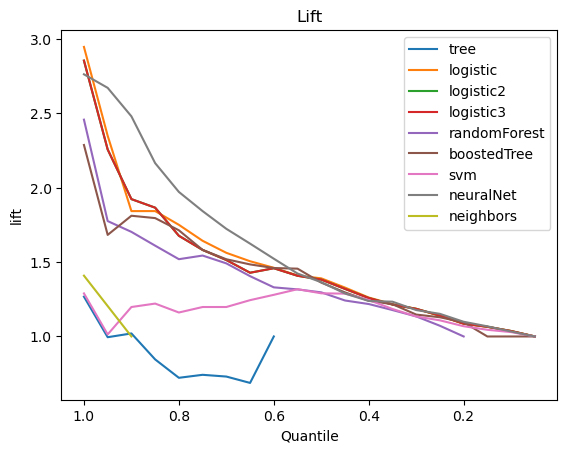

In [273]:
#plotting lift for all models

for model in models:     
    plt.plot(lifts[model]["Quantile"], lifts[model]["Lift"])
    plt.gca().invert_xaxis()
    plt.xlabel("Quantile")
    plt.ylabel("lift")
    plt.title("Lift")
    plt.legend(models)

Text(0.5, 1.0, 'Lift')

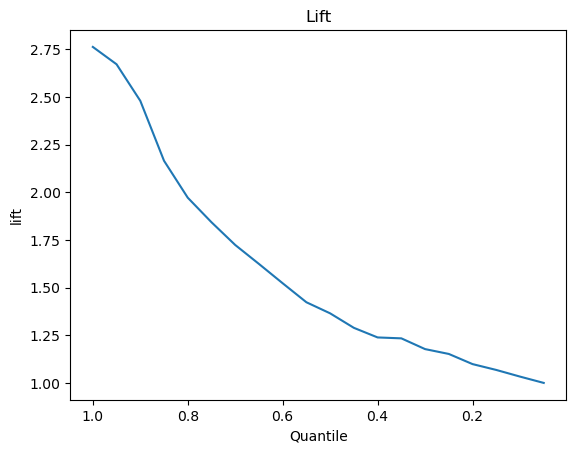

In [290]:
#plotting lift for all Nueral Network

plt.plot(lifts["neuralNet"]["Quantile"], lifts["neuralNet"]["Lift"])
plt.gca().invert_xaxis()
plt.xlabel("Quantile")
plt.ylabel("lift")
plt.title("Lift")

Text(0.5, 1.0, 'Cumulative gains')

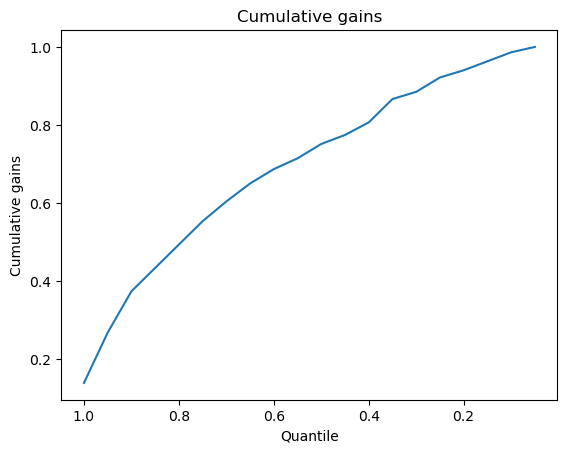

In [275]:
#Cumulative gains for Nueral Network

plt.plot(gains["neuralNet"]["Quantile"], gains["neuralNet"]["Cumulative gains"])
plt.gca().invert_xaxis()
plt.ylabel("Cumulative gains")
plt.xlabel("Quantile")
plt.title("Cumulative gains")

Text(0.5, 1.0, 'Cumulative response')

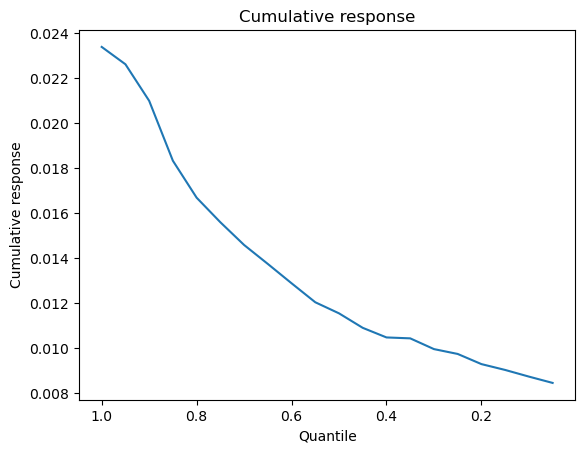

In [278]:
#Cumulative respones for Nueral Network

plt.plot(responses["neuralNet"]["Quantile"], responses["neuralNet"]["Cumulative response"])
plt.gca().invert_xaxis()
plt.xlabel("Quantile")
plt.ylabel("Cumulative response")
plt.title("Cumulative response")

In [279]:
#Running Nueral network on the donors selected for 7662 campaign and getting the probablity

donor_score = basetable7662.copy()
donor_score['probability'] = pd.DataFrame(neuralNet.predict_proba(donor_score[selectedFeatures]))[1]
donor_score['donated'] = pd.DataFrame(neuralNet.predict(donor_score[selectedFeatures]))
donor_score

,donorID,zipcode,dateOfBirth,province_flags,gender_flags,zipcode_flags,DonorAge6169,DonorAgeGroup6169,DonorAge7244,DonorAgeGroup7244,...,BM_September,Recency,Frequency,Monetary,LOR,max_amount,min_amount,avg_amount,probability,donated
0,134242,3580.0,1966-09-28 00:00:00,0.0,0.0,0.0,52.0,50.0,53.0,50.0,...,1.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.011138,0.0
1,126503,4250.0,1949-10-20 00:00:00,0.0,0.0,0.0,69.0,60.0,70.0,70.0,...,0.0,1268.0,1.0,50.00,5.10,50.0,50.0,50.00,0.074794,0.0
2,104392,4820.0,1974-05-03 00:00:00,0.0,0.0,0.0,44.0,40.0,45.0,40.0,...,0.0,1267.0,1.0,50.00,5.10,50.0,50.0,50.00,0.176316,0.0
3,105905,8370.0,1970-09-18 00:00:00,0.0,0.0,0.0,48.0,40.0,49.0,40.0,...,1.0,-529.0,2.0,155.00,0.61,100.0,55.0,77.50,1.000000,1.0
4,120506,8020.0,1973-09-19 00:00:00,0.0,0.0,0.0,45.0,40.0,46.0,40.0,...,1.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.008757,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26517,114719,8560.0,1972-05-22 00:00:00,0.0,0.0,0.0,46.0,40.0,47.0,40.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.009056,0.0
26518,134824,2920.0,1975-01-31 00:00:00,0.0,0.0,0.0,43.0,40.0,44.0,40.0,...,0.0,2227.0,1.0,100.00,7.73,100.0,100.0,100.00,0.031639,0.0
26519,143259,8430.0,1995-02-12 00:00:00,0.0,0.0,0.0,23.0,20.0,24.0,20.0,...,0.0,600.0,1.0,40.00,3.27,40.0,40.0,40.00,0.058261,0.0
26520,123936,9880.0,1977-01-20 00:00:00,0.0,0.0,0.0,41.0,40.0,42.0,40.0,...,0.0,1960.0,8.0,248.32,10.58,35.0,30.0,31.04,0.032287,0.0


In [250]:
#checking the numnber of donors who are predicted to donate
donor_score[donor_score['donated'] == 1].count()

donorID                     2041
zipcode                     2041
dateOfBirth                 2041
province_flags              2041
gender_flags                2041
zipcode_flags               2041
DonorAge6169                2041
DonorAgeGroup6169           2041
DonorAge7244                2041
DonorAgeGroup7244           2041
Age                         2041
DonorAgeGroup7662           2041
gender_recoded              2041
language_recoded            2041
province_Brussels           2041
province_East Flanders      2041
province_Flemish Brabant    2041
province_Hainaut            2041
province_Liege              2041
province_Limburg            2041
province_Luxembourg         2041
province_Namur              2041
province_Walloon Brabant    2041
province_West Flanders      2041
region_Flanders             2041
region_Wallonia             2041
BM_August                   2041
BM_December                 2041
BM_February                 2041
BM_January                  2041
BM_July   

In [280]:
#checking the numnber of donors who are predicted to have a 80% or more probability to donate
donor_score[(donor_score['donated'] == 1) & (donor_score['probability'] > 0.8)].count()

donorID                     1833
zipcode                     1833
dateOfBirth                 1833
province_flags              1833
gender_flags                1833
zipcode_flags               1833
DonorAge6169                1833
DonorAgeGroup6169           1833
DonorAge7244                1833
DonorAgeGroup7244           1833
Age                         1833
DonorAgeGroup7662           1833
gender_recoded              1833
language_recoded            1833
province_Brussels           1833
province_East Flanders      1833
province_Flemish Brabant    1833
province_Hainaut            1833
province_Liege              1833
province_Limburg            1833
province_Luxembourg         1833
province_Namur              1833
province_Walloon Brabant    1833
province_West Flanders      1833
region_Flanders             1833
region_Wallonia             1833
BM_August                   1833
BM_December                 1833
BM_February                 1833
BM_January                  1833
BM_July   

### Exporting results to CSV

In [310]:
#creating a subset with the required data
result = donor_score.filter(['donorID','probability'], axis=1)

In [309]:
#exporting the CSV
result.to_csv('result.csv', index = False)